In [3]:
import pandas as pd
from collections import Counter
from ast import literal_eval


C:\Users\astri\AppData\Local\Temp\ipykernel_1784\1629638367.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
data = pd.read_csv('large_dataset_cleaned.csv', low_memory=True)

C:\Users\astri\AppData\Local\Temp\ipykernel_1784\2110240922.py:1: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('large_dataset_cleaned.csv', low_memory=True)


In [5]:
data["content"]=data["content"].apply(lambda x:literal_eval(x))

In [ ]:
print(data["content"][0][0])

In [8]:
#træk informations-kategori og content ud i én dataframe
article_type = data['type']
data['type'] = data['type'].astype('category')

fakenews = set(['unreliable', 'fake', 'conspiracy'])
#overskydende er reliable, nan og unknown
def label_news(field):
    '''function for labeling news articles as either fake, reliable or unknown'''
    if field in fakenews:
        return 'fake'
    elif field == 'reliable':
        return 'reliable'
    else:
        return 'unknown'

data['simple_type'] = data['type'].apply(lambda x:label_news(x)).astype('category') #laver en ny kolonne med lidt simplere kategorier

print(data['type'].value_counts())
data["type"].to_frame().value_counts().plot(kind='bar',ylabel="count",title="Distribution of types")
print(data['simple_type'].value_counts())

type
reliable                      218564
political                     194518
bias                          133232
fake                          104883
conspiracy                     97314
rumor                          56445
unknown                        43534
unreliable                     35332
clickbait                      27412
junksci                        14040
satire                         13160
hate                            8779
2018-02-10 13:43:39.521661         1
Name: count, dtype: int64
simple_type
unknown     491121
fake        237529
reliable    218564
Name: count, dtype: int64


Exploration uden cleaning

scraping time statistics:
 count                         994987
unique                        214961
top       2018-01-25 20:13:50.426130
freq                          121551
Name: scraped_at, dtype: object


<Axes: title={'center': 'Distribution of scraping times'}, xlabel='scraped_at', ylabel='count'>

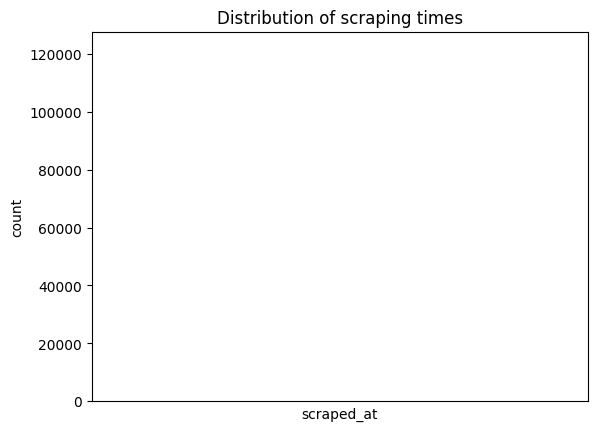

In [4]:
#More  exploration
print("scraping time statistics:\n", data['scraped_at'].describe())
#data["scraped_at"].to_frame().value_counts().plot(kind='bar',ylabel="count",title="Distribution of scraping times",xticks=[])
#dvs de er alle sammen indsamlet i 2018
#obs: det virker ikke muligt at finde ud af præcis hvornår hver enkelt artikel er fra? Det virker vigtigt

In [5]:
print("authors:\n", data['authors'].describe())
#data['authors'].to_frame().value_counts().plot(kind='bar',xticks=[])

authors:
 count                                                552243
unique                                                99957
top       Backgroundurl Avatar_Large, Nickname, Joined, ...
freq                                                  61398
Name: authors, dtype: object


In [6]:
print("\ndomains:\n", data['domain'].describe())
#data['domain'].to_frame().value_counts().plot(kind='bar',ylabel="count",xticks=[],title="Distribution of domains")
#obs: 155 af data kommer fra den samme, og generelt ikke særligt velfordelte kilder



domains:
 count          994989
unique            683
top       nytimes.com
freq           176144
Name: domain, dtype: object


In [ ]:
data["numbers"]=data["content"].apply(lambda x:Counter(x)["number"])
data["numbers"].describe()

Exploration post cleaning

In [23]:
#Længde på ord, middelværdi og spredning
#alle plots kan også laves uden group-by hvis inddelingen ikke er så interessant
#vocabulary size/antal ord, middelværdi og spredning
def mean_length_of_words(wordlist):
    totallength = 0
    wordcount = 0
    for word in wordlist:
        totallength = totallength + len(str(word))
        wordcount+=1
    return totallength/len(wordlist)

def unique_words_ratio(wordlist):
    count = 0
    words = {}
    for word in wordlist:
        if word not in words:
            words[word]=1
            count +=1
    return count/len(wordlist)

In [9]:
data['mean_word_length']=data["content"].apply(lambda x:mean_length_of_words(x))
data.groupby('type',observed=False)['mean_word_length'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
2018-02-10 13:43:39.521661,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
bias,133232.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
clickbait,27412.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
conspiracy,97314.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
fake,104883.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
hate,8779.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
junksci,14040.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
political,194518.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
reliable,218564.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
data.groupby('simple_type',observed=False)['mean_word_length'].describe()

In [ ]:
data['unique_words_ratio']=data["content"].apply(lambda x:unique_words_ratio(x))
data.groupby('type')['unique_words_ratio'].describe()

In [ ]:
data.groupby('simple_type')['unique_words_ratio'].describe()

In [ ]:
data["length"]=data["content"].apply(lambda x: len(x))
data.groupby('type')['length'].describe()


In [ ]:
data.groupby('simple_type')['length'].describe()

Baseline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm

#getting relevant variebles for modelling
relevant = ['fake','reliable']

data = data[data["simple_type"].isin(relevant) == True] #fjerne ikke-relevante rækker, simple type tracker definitionen af fake news 
print("row count after removal:", len(data))

X = data.drop(["type"],axis=1).drop(["simple_type"],axis=1) #lav x-vector
y = data["simple_type"] #lav target-vector

X_train, X_val, y_train, y_val= train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val,y_val, test_size=0.5,random_state=0,shuffle=True)

#lav numerisk target-vector
def bin_target(x):
    if x=="reliable":
        return 0
    if x=="fake":
        return 1

bin_y_train = y_train.apply(lambda x:bin_target(x)) #get binary target
bin_y_test = y_test.apply(lambda x:bin_target(x)) #get binary target

 

In [ ]:
#baseline: logistic regression where x is length of article
article_length_train = pd.DataFrame(X_train["content"].apply(lambda x: len(x))) #get feature with length of article (overvej om det er stemmed man skal gøre det på?)
article_length_test = pd.DataFrame(X_test["content"].apply(lambda x: len(x))) #get feature with length of article (overvej om det er stemmed man skal gøre det på?)

def gridSearch(solver,penalties,data,target):
    model = LogisticRegression()
    parameters = {'solver' : solver,'penalty': penalties, 'C' : [0.001, 0.01, 0.1, 1.0, 10]}
    clf = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
    clf.fit(data,target)
    return clf

articlelen1 = gridSearch(["liblinear"], ["l2","l2"], pd.DataFrame(article_length_train), bin_y_train)
articlelen2 = gridSearch(["newton-cg", "sag","lbfgs"], ["l2","None"],pd.DataFrame(article_length_train), bin_y_train)
articlelen3 = gridSearch(["saga"], ["elastic-net","l1","l2","None"], pd.DataFrame(article_length_train), bin_y_train)

baselines = [articlelen1,articlelen2,articlelen3]
#for baseline in baselines:
#    bestscore = 0
#    bestmodel = articlelen1
#    if baseline.best_score_>bestscore:
#        bestscore = baseline.best_score_
#        bestmodel = baseline.best_params_

#print('Baseline model is logistic regression with parameters ',bestmodel)
#print("with accuracy:", bestscore)


In [ ]:
results_df = pd.DataFrame(baselines)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
).rename_axis("kernel")
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

In [ ]:
from itertools import combinations
from math import factorial
from scipy.stats import t
import numpy as np
#forsøg på at kontrollere for multiple comparison

pairwise_bayesian = []
model_scores = results_df.filter(regex=r"split\d*_test_score")

model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1

def corrected_std(differences, n_train, n_test):
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std

rope_interval = [-0.01, 0.01]


for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_post = t(
        df, loc=np.mean(differences), scale=corrected_std(differences, article_length_train, article_length_test)
    )
    worse_prob = t_post.cdf(rope_interval[0])
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])

pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]
).round(3)

pairwise_bayesian_df